In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score

# Load dataset
data_df = pd.read_excel(r"C:\Users\Asad shaikh\Documents\EastWestAirlines.xlsx",sheet_name="data")

# Drop ID and Award columns
data = data_df.drop(columns=["ID#", "Award?"])

In [2]:
# Handle outliers using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Trim outliers
data = data[(data >= lower_bound) & (data <= upper_bound)].dropna()


In [3]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [4]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
print(f"K-Means Silhouette Score: {silhouette_score(data_scaled, kmeans_labels):.3f}")

K-Means Silhouette Score: 0.216


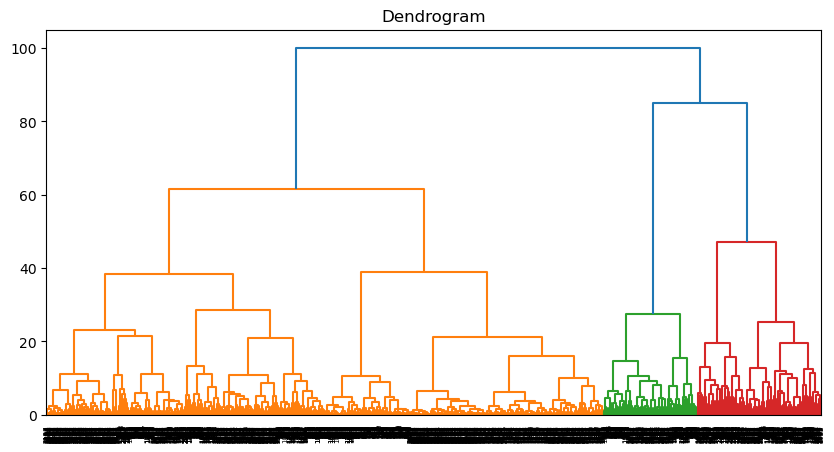

Hierarchical Silhouette Score: 0.364


In [5]:
# Hierarchical Clustering
dend = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(dend)
plt.title("Dendrogram")
plt.show()


# Apply Hierarchical Clustering
hierarchical_labels = fcluster(dend, t=3, criterion='maxclust')
print(f"Hierarchical Silhouette Score: {silhouette_score(data_scaled, hierarchical_labels):.3f}")

DBSCAN Silhouette Score: 0.323


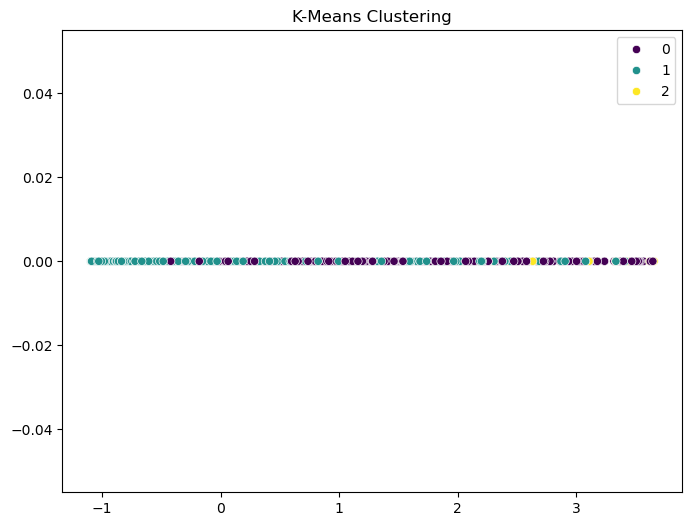

In [6]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)

# Evaluate DBSCAN (ignore noise points for silhouette score)
valid_labels = dbscan_labels[dbscan_labels != -1]
if len(set(valid_labels)) > 1:
    print(f"DBSCAN Silhouette Score: {silhouette_score(data_scaled[dbscan_labels != -1], valid_labels):.3f}")
else:
    print("DBSCAN did not find meaningful clusters.")

# Scatter plot for K-Means clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=kmeans_labels, palette='viridis')
plt.title("K-Means Clustering")
plt.show()
